## Since we are working on a cloud based IDE we are importing Google drive to access the data folder. If you are accessing through a local IDE the path to the dataset will change

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the Libraries

In [28]:
import cv2
import imghdr
import os
import matplotlib.pyplot as plt
import tensorflow as tf


In [32]:
data_dir='/content/drive/MyDrive/data' #This path will change if you are working on a local IDE 

In [4]:
image_exts=['jpeg','png','jpg','bmp']

In [8]:
image_exts[:]

['jpeg', 'png', 'jpg', 'bmp']

In [10]:
os.listdir(data_dir)

['happy', 'sad']

In [14]:
for image_class in os.listdir(data_dir):
  print(image_class)

happy
sad


Saving the image in an array and the plotting the test data

In [16]:
img=cv2.imread(os.path.join(data_dir,'happy','1-2.jpg'))

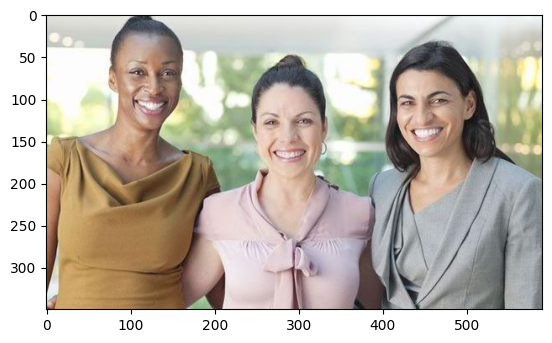

In [25]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));

Creating a for loop to access all the images and then remove any unwanted images

In [27]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
        print('Issue with image {}'.format(image_path))

## Tensorflow has it's own dataset  

 Load Data

In [34]:
tf.data.Dataset??

In [31]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

Importing NUMPY


In [33]:
import numpy as np


In [37]:
tf.keras.utils.image_dataset_from_directory?? #this will help us read all the files

In [35]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 305 files belonging to 2 classes.


In [39]:
data_iterator=data.as_numpy_iterator()

In [40]:
data_iterator

In [48]:
batch = data_iterator.next()

In [49]:
#images represented as npumpy array
batch[0].shape

(32, 256, 256, 3)

In [50]:
batch[1]

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

### As you can see class 0 represents happy image and class 1 represents sad image

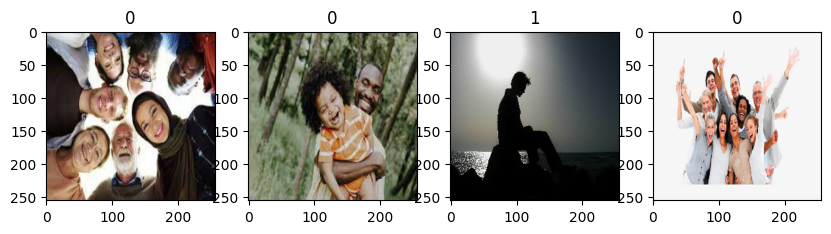

In [56]:
fix,ax=plt.subplots(ncols=4,figsize=(10,10))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

### Scaling the data

In [62]:
scaled=batch[0]/255

In [63]:
scaled.max()

1.0

In [64]:
scaled.min()

0.0

# Preprocessing The Data

Scaled Data

In [65]:
data=data.map(lambda x,y: (x/255,y))

In [68]:
scaled_iterator=data.as_numpy_iterator().next()

In [72]:
batch=scaled_iterator

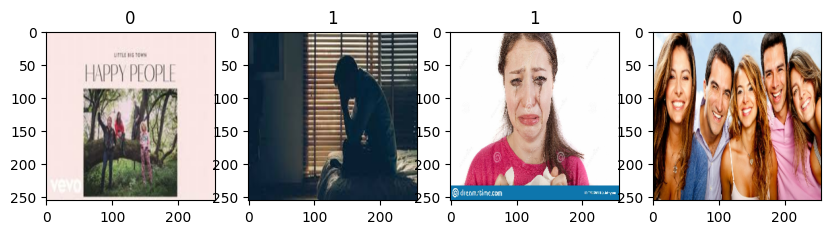

In [74]:
fix,ax=plt.subplots(ncols=4,figsize=(10,10))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

Splitting the data

In [77]:
len(data)

10

In [78]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)


In [87]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

## Building a Deep Learning Model 

Importing the libraries

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [93]:
model=Sequential()

In [94]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [95]:
from keras.engine.training import optimizer
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Training the Model

Create a folder naming them logs this can create a checkpoint for us to find out our model training

The logdir (log directory) part is completely optional if you do not want to save the log in a file you can skip this 

In [98]:
logdir='/content/drive/MyDrive/Logs'  # this part can be ignored if you do not want a log for your model training 

In [99]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [100]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 32s 4s/step - loss: 2.0106 - accuracy: 0.5268 - val_loss: 0.6974 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 23s 3s/step - loss: 0.6858 - accuracy: 0.5357 - val_loss: 0.6480 - val_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - 23s 3s/step - loss: 0.6294 - accuracy: 0.6384 - val_loss: 0.5933 - val_accuracy: 0.7812
Epoch 4/20
7/7 [==============================] - 29s 4s/step - loss: 0.5418 - accuracy: 0.7812 - val_loss: 0.4477 - val_accuracy: 0.8594
Epoch 5/20
7/7 [==============================] - 23s 3s/step - loss: 0.4486 - accuracy: 0.8214 - val_loss: 0.3377 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 28s 4s/step - loss: 0.4657 - accuracy: 0.8571 - val_loss: 0.3995 - val_accuracy: 0.7969
Epoch 7/20
7/7 [==============================] - 29s 4s/step - loss: 0.4440 - accuracy: 0.8036 - val_loss: 0.2576 - val_accuracy: 0.9531
Epoch 8/20
7/7 [==================

## Plotting the Performance

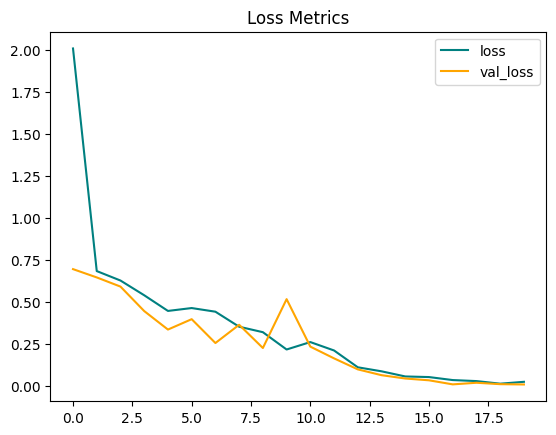

In [111]:
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
plt.title('Loss Metrics')
plt.legend(loc='upper right')
plt.show()

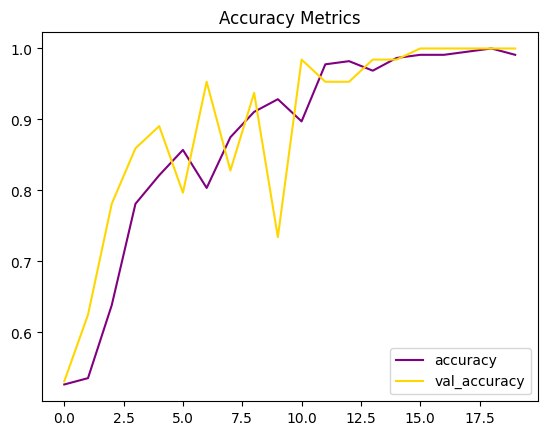

In [112]:
plt.plot(hist.history['accuracy'],color='purple',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='gold',label='val_accuracy')
plt.title('Accuracy Metrics')
plt.legend(loc='lower right')
plt.show()

## Evaluating the Performance

Importing the libraries

In [113]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [114]:
precision= Precision()
recall=Recall()
accuracy=BinaryAccuracy()

In [115]:
for batch in test.as_numpy_iterator():
  X,y=batch
  y_pred=model.predict(X)
  precision.update_state(y,y_pred)
  recall.update_state(y,y_pred)
  accuracy.update_state(y,y_pred)

1/1 [==============================] - 0s 444ms/step


In [120]:
print(f'The Precision is: {precision.result()}\nThe Recall is: {recall.result()}\nThe Accuracy is: {accuracy.result()}')

The Precision is: 1.0
The Recall is: 1.0
The Accuracy is: 1.0


## Testing out the model

Importing a random happy/sad image downloaded from the browser

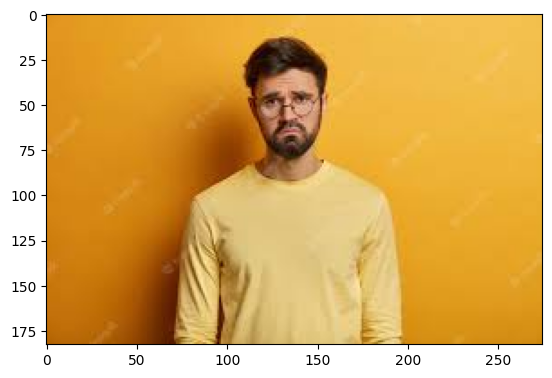

In [140]:
img=cv2.imread('/content/drive/MyDrive/data/Sad.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

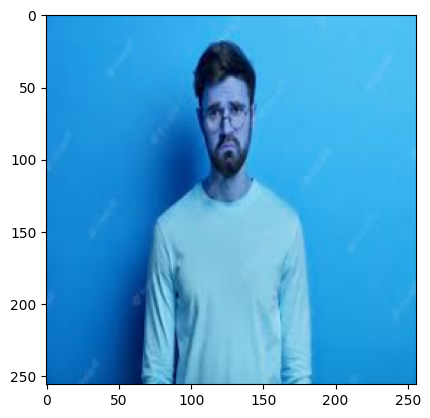

In [141]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [142]:
y_pred=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 69ms/step


### The array provided in y_pred shows that if the value is close to 1 then it is an image of a sad person and if the value is close to 0 then the image is of a happy person


In [143]:
y_pred 

array([[0.99832475]], dtype=float32)

In [145]:
if y_pred > 0.55:
  print('The Predicted Image is a Sad Person')
else:
  print('The Predicted Image is a Happy Person')

The Predicted Image is a Sad Person
